
### Predictive Modeling Of Us Stock Market And Commodities Impact of Economcis 
### Import Library Files 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Load The Dataset 

In [2]:
df = pd.read_csv("US_Stock_Data.csv")
df

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,8/1/2020,2.141,242560.0,59.61,1210000.0,2.8120,77700.0,"8,059.60",1190000,...,"3,39,188",190,339.26,7110000,94.60,70240000,215.22,13490000,"1,560.20",813410.0
1009,1009,7/1/2020,2.162,163010.0,62.70,582650.0,2.7935,59470.0,"8,155.70",1010000,...,"3,38,901",280,330.75,4740000,95.34,82680000,213.06,15110000,"1,574.30",435870.0
1010,1010,6/1/2020,2.135,154680.0,63.27,724240.0,2.7900,59570.0,"7,759.10",786750,...,"3,40,210",280,335.83,5670000,95.14,81310000,212.60,17070000,"1,568.80",558970.0
1011,1011,3/1/2020,2.130,144670.0,63.05,885860.0,2.7870,74750.0,"7,343.10",936290,...,"3,39,155",220,325.90,3800000,93.75,75330000,208.67,11200000,"1,552.40",436740.0


### Dataset Overview 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

In [4]:
df.describe()

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.
count,1013.000000,1013.000000,1009.000000,1013.000000,9.900000e+02,1013.000000,976.000000,1.013000e+03,636.000000,1.013000e+03,...,1013.000000,1.013000e+03,1013.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1011.000000
mean,506.000000,3.726667,129091.932607,69.853475,3.571739e+05,3.726843,37606.752049,4.924137e+07,9082.515723,1.958002e+07,...,219.738065,4.629821e+07,2918.400790,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,189442.393670
std,292.572213,1.943030,64035.426727,21.986697,1.864309e+05,0.646524,39192.315092,3.251389e+08,8876.538587,1.469409e+08,...,128.668703,1.878815e+07,2715.637488,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,104007.872337
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,2.600000e+02,0.000000,7.518000e+04,...,49.100000,9.790000e+06,120.000000,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,0.000000
25%,253.000000,2.447000,88680.000000,54.760000,2.751800e+05,3.408000,380.000000,7.142000e+04,1120.000000,5.272300e+05,...,131.980000,3.348000e+07,760.000000,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,142985.000000
50%,506.000000,2.880000,125980.000000,72.910000,3.450350e+05,3.800500,31635.000000,1.288800e+05,6070.000000,9.665800e+05,...,179.130000,4.368000e+07,2040.000000,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,181200.000000
75%,759.000000,4.805000,164810.000000,82.810000,4.269225e+05,4.251500,70982.500000,3.860000e+05,15287.500000,3.670000e+06,...,272.470000,5.640000e+07,4090.000000,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,231500.000000
max,1012.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,4.470000e+09,42830.000000,1.790000e+09,...,661.600000,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000


In [5]:
df.isna().mean()


Unnamed: 0           0.000000
Date                 0.000000
Natural_Gas_Price    0.000000
Natural_Gas_Vol.     0.003949
Crude_oil_Price      0.000000
Crude_oil_Vol.       0.022705
Copper_Price         0.000000
Copper_Vol.          0.036525
Bitcoin_Price        0.000000
Bitcoin_Vol.         0.000000
Platinum_Price       0.000000
Platinum_Vol.        0.372162
Ethereum_Price       0.000000
Ethereum_Vol.        0.000000
S&P_500_Price        0.000000
Nasdaq_100_Price     0.000000
Nasdaq_100_Vol.      0.000987
Apple_Price          0.000000
Apple_Vol.           0.000000
Tesla_Price          0.000000
Tesla_Vol.           0.000000
Microsoft_Price      0.000000
Microsoft_Vol.       0.000000
Silver_Price         0.000000
Silver_Vol.          0.045410
Google_Price         0.000000
Google_Vol.          0.000000
Nvidia_Price         0.000000
Nvidia_Vol.          0.000000
Berkshire_Price      0.000000
Berkshire_Vol.       0.000000
Netflix_Price        0.000000
Netflix_Vol.         0.000000
Amazon_Pri

In [6]:
df.isna().sum()


Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [7]:
df['Date'] = df['Date'].str.replace('/', '-')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


### Expolatory Data Analysis ( EDA )

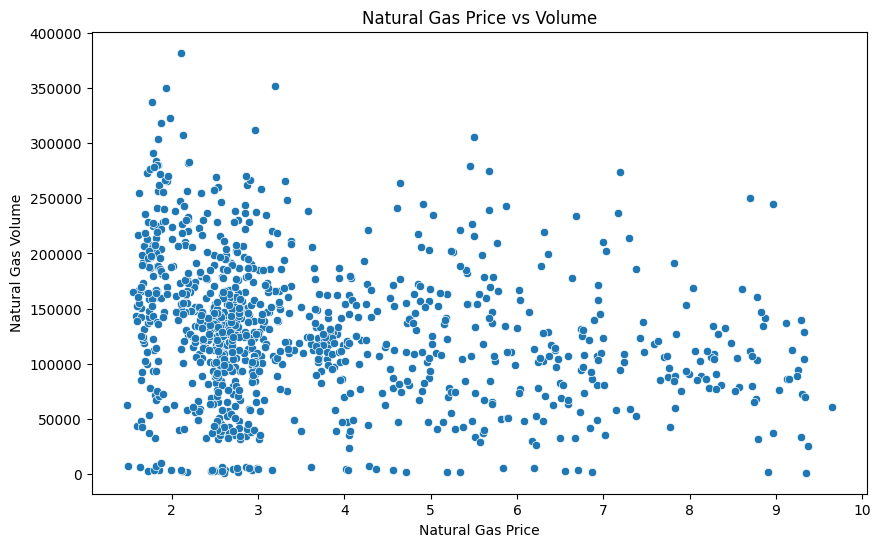

In [8]:
# Scatter plot for Price vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Natural_Gas_Price', y='Natural_Gas_Vol.', data=df)
plt.title("Natural Gas Price vs Volume")
plt.xlabel("Natural Gas Price")
plt.ylabel("Natural Gas Volume")
plt.show()

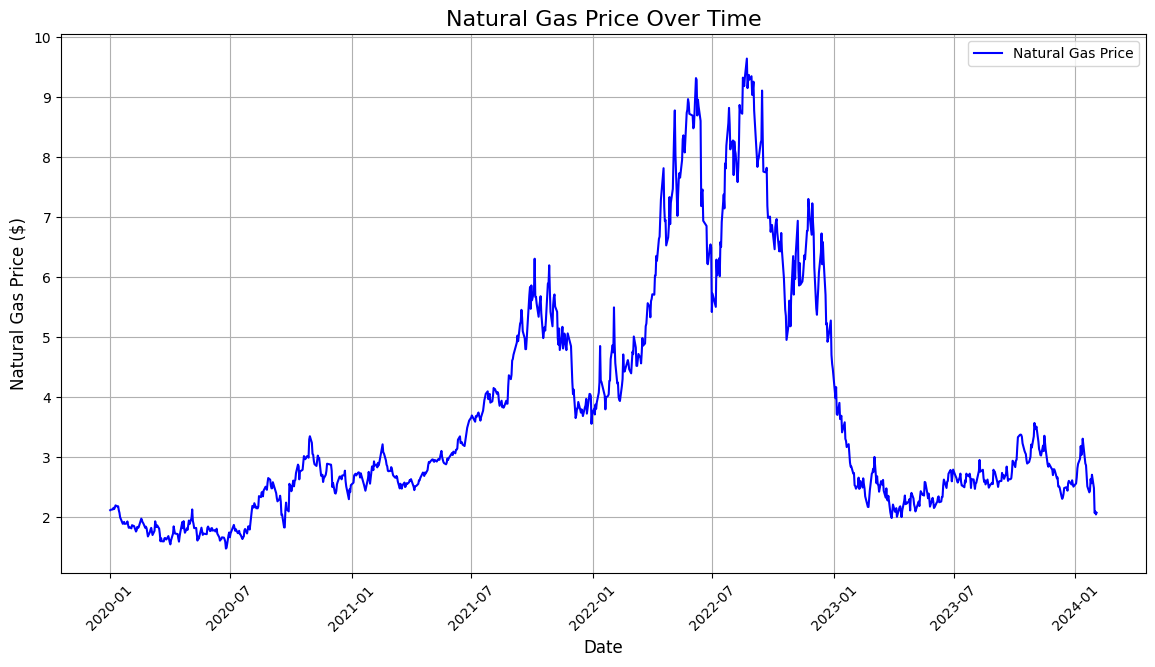

In [9]:
# 1. Time Series Trend of Natural Gas Price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Natural_Gas_Price'], color='blue', label='Natural Gas Price')
plt.title("Natural Gas Price Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Natural Gas Price ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


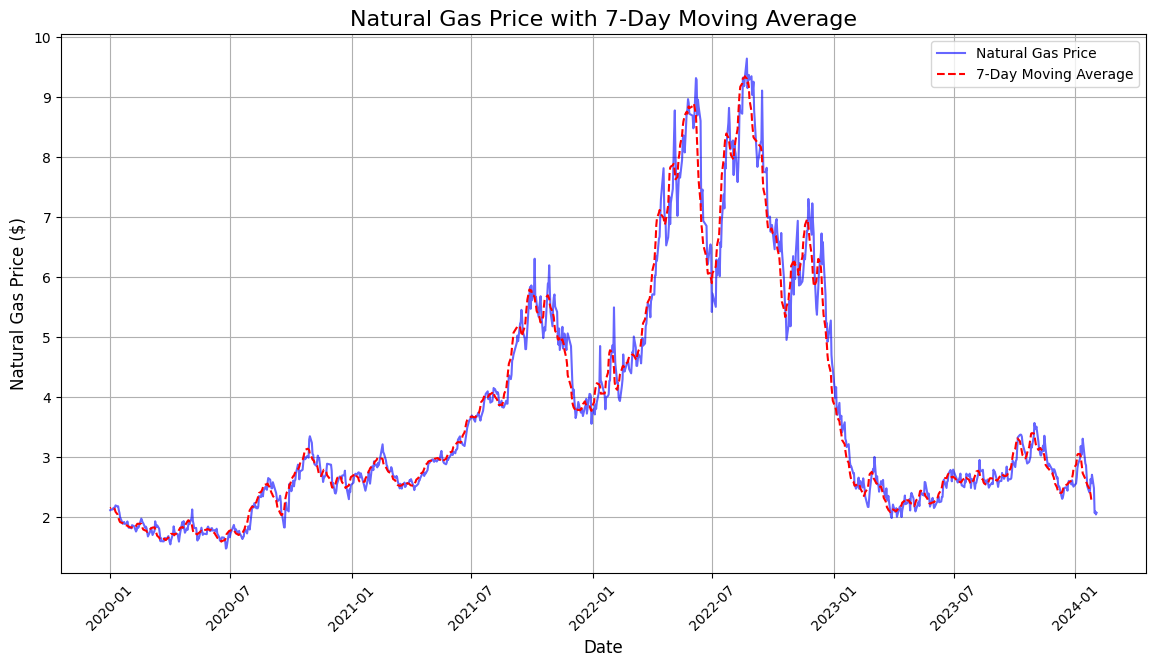

In [10]:
# 5. Moving Average of Natural Gas Price (Trend Smoothing)
df['Price_MA_7'] = df['Natural_Gas_Price'].rolling(window=7).mean()  # 7-day moving average

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Natural_Gas_Price'], label='Natural Gas Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Price_MA_7'], label='7-Day Moving Average', color='red', linestyle='--')
plt.title("Natural Gas Price with 7-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Natural Gas Price ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

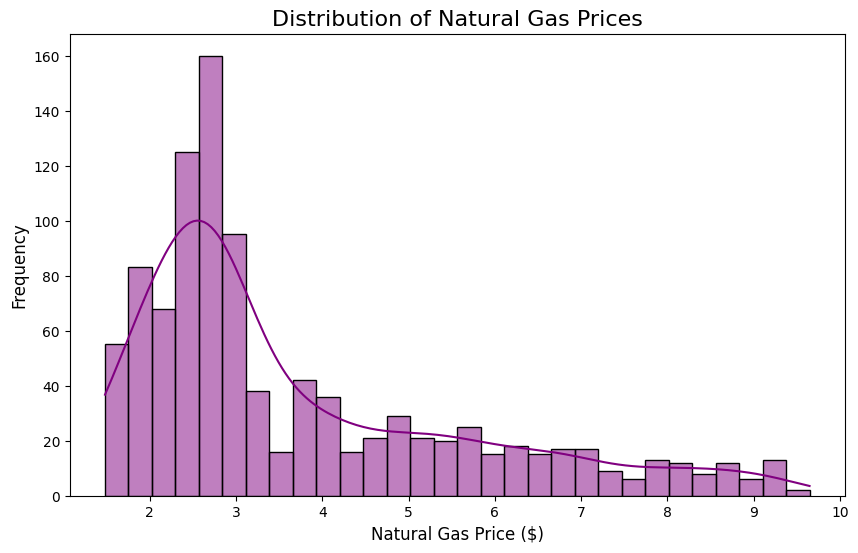

In [11]:
# 3. Histogram of Natural Gas Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Natural_Gas_Price'], bins=30, kde=True, color='purple')
plt.title("Distribution of Natural Gas Prices", fontsize=16)
plt.xlabel("Natural Gas Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

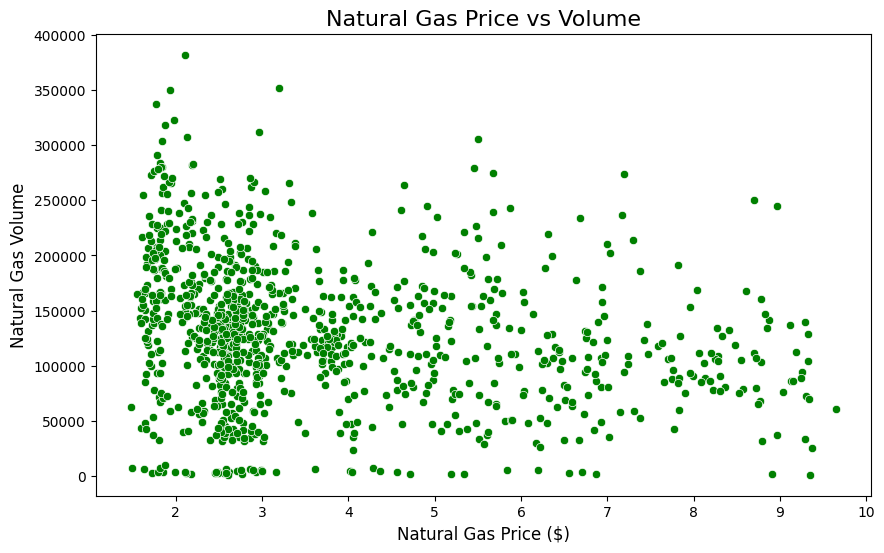

In [12]:
# 2. Volume vs Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Natural_Gas_Price', y='Natural_Gas_Vol.', data=df, color='green')
plt.title("Natural Gas Price vs Volume", fontsize=16)
plt.xlabel("Natural Gas Price ($)", fontsize=12)
plt.ylabel("Natural Gas Volume", fontsize=12)
plt.show()

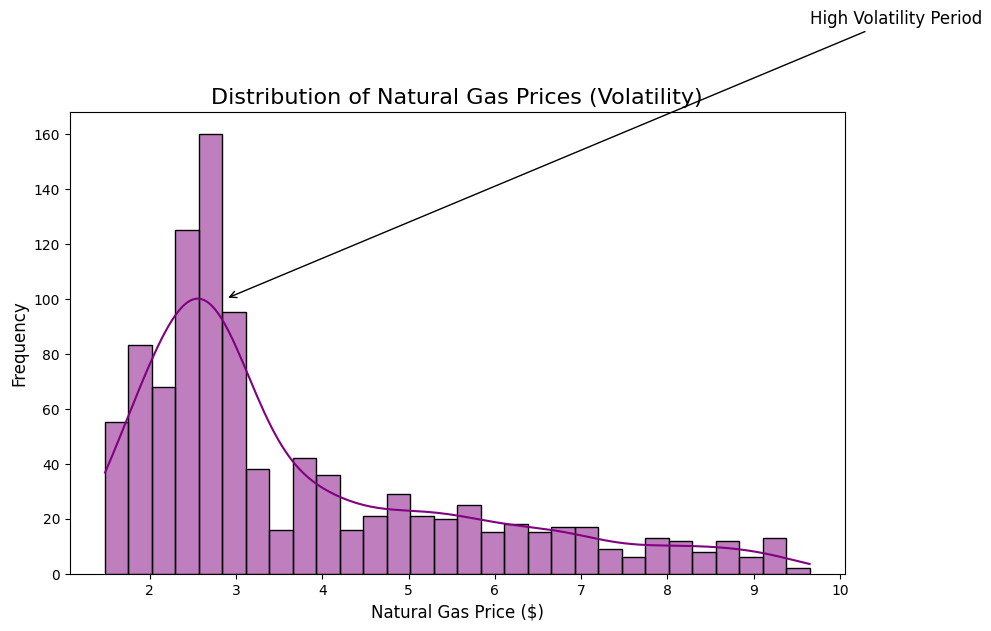

In [13]:
# 3. Price Distribution with Volatility Analysis (Business Insights)
plt.figure(figsize=(10, 6))
sns.histplot(df['Natural_Gas_Price'], bins=30, kde=True, color='purple')
plt.title("Distribution of Natural Gas Prices (Volatility)", fontsize=16)
plt.xlabel("Natural Gas Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotating high volatility periods
plt.annotate('High Volatility Period', xy=(df['Natural_Gas_Price'].median(), 100), 
             xytext=(df['Natural_Gas_Price'].max(), 200),
             arrowprops=dict(facecolor='blue', arrowstyle='->'),
             fontsize=12, color='black')

plt.show()

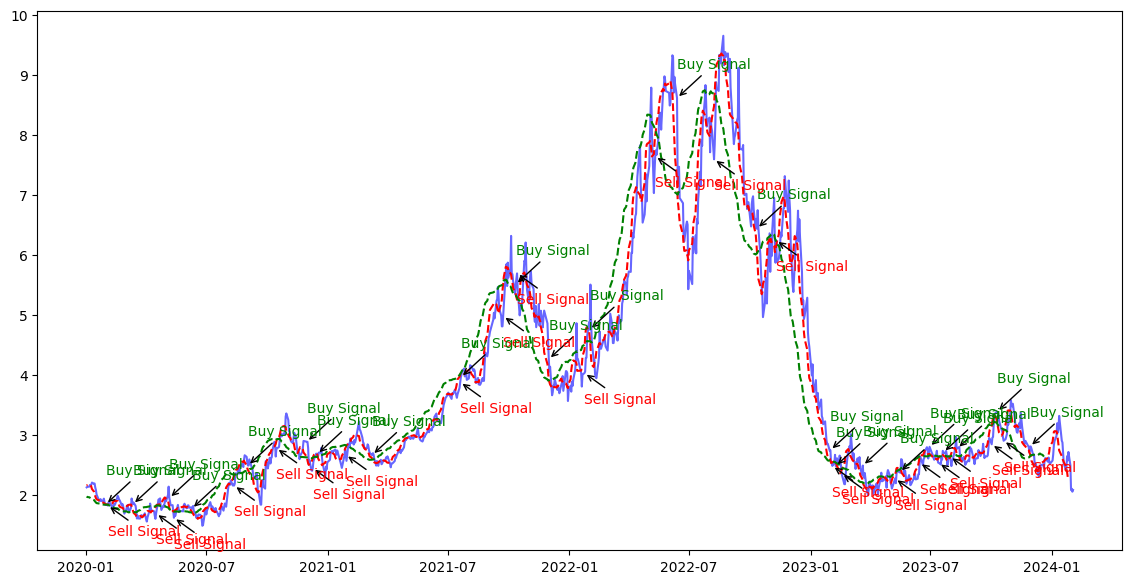

In [14]:
# 5. Moving Averages for Business Strategy: Identifying Buy/Sell Signals
# Short-term (7 days) and Long-term (30 days) moving averages
df['Price_MA_7'] = df['Natural_Gas_Price'].rolling(window=7).mean()  # 7-day moving average
df['Price_MA_30'] = df['Natural_Gas_Price'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Natural_Gas_Price'], label='Natural Gas Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Price_MA_7'], label='7-Day Moving Average', color='red', linestyle='--')
plt.plot(df['Date'], df['Price_MA_30'], label='30-Day Moving Average', color='green', linestyle='--')

# Adding Buy/Sell signal annotations based on crossovers
for i in range(1, len(df)):
    if df['Price_MA_7'][i] > df['Price_MA_30'][i] and df['Price_MA_7'][i-1] <= df['Price_MA_30'][i-1]:
        plt.annotate('Buy Signal', xy=(df['Date'][i], df['Natural_Gas_Price'][i]),
                     xytext=(df['Date'][i], df['Natural_Gas_Price'][i] + 0.5),
                     arrowprops=dict(facecolor='green', arrowstyle='->'),
                     fontsize=10, color='green')
    elif df['Price_MA_7'][i] < df['Price_MA_30'][i] and df['Price_MA_7'][i-1] >= df['Price_MA_30'][i-1]:
        plt.annotate('Sell Signal', xy=(df['Date'][i], df['Natural_Gas_Price'][i]),
                     xytext=(df['Date'][i], df['Natural_Gas_Price'][i] - 0.5),
                     arrowprops=dict(facecolor='red', arrowstyle='->'),
                     fontsize=10, color='red')

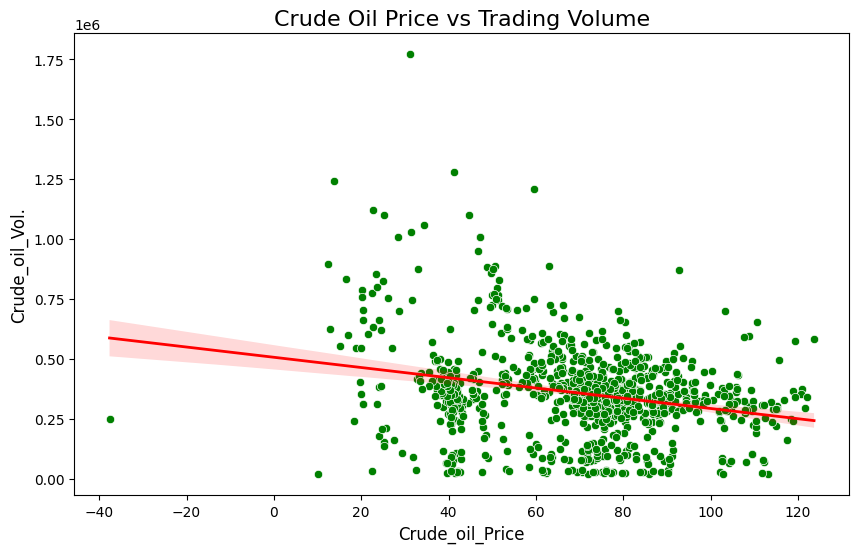

In [15]:
# 2. Volume vs Price Analysis: Understanding Market Interest and Price Movement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Crude_oil_Price', y='Crude_oil_Vol.', data=df, color='green')
plt.title("Crude Oil Price vs Trading Volume", fontsize=16)
plt.xlabel("Crude Oil Price ($)", fontsize=12)
plt.ylabel("Crude Oil Trading Volume", fontsize=12)

# Adding a trendline to show the relationship
sns.regplot(x='Crude_oil_Price', y='Crude_oil_Vol.', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

plt.show()

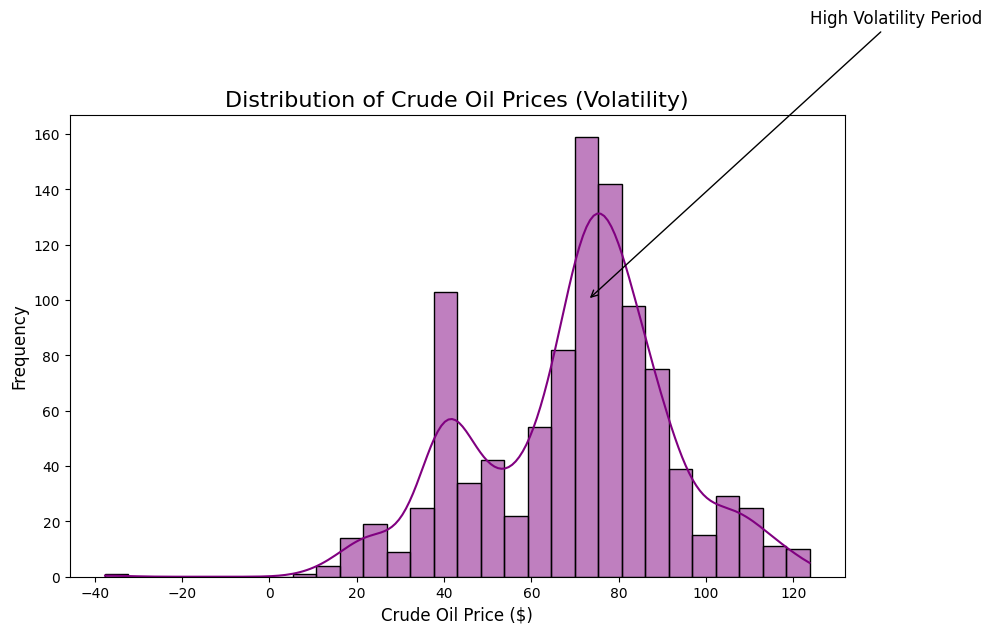

In [16]:
# 3. Price Distribution & Volatility Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Crude_oil_Price'], bins=30, kde=True, color='purple')
plt.title("Distribution of Crude Oil Prices (Volatility)", fontsize=16)
plt.xlabel("Crude Oil Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotating high volatility periods
plt.annotate('High Volatility Period', xy=(df['Crude_oil_Price'].median(), 100), 
             xytext=(df['Crude_oil_Price'].max(), 200),
             arrowprops=dict(facecolor='blue', arrowstyle='->'),
             fontsize=12, color='black')

plt.show()

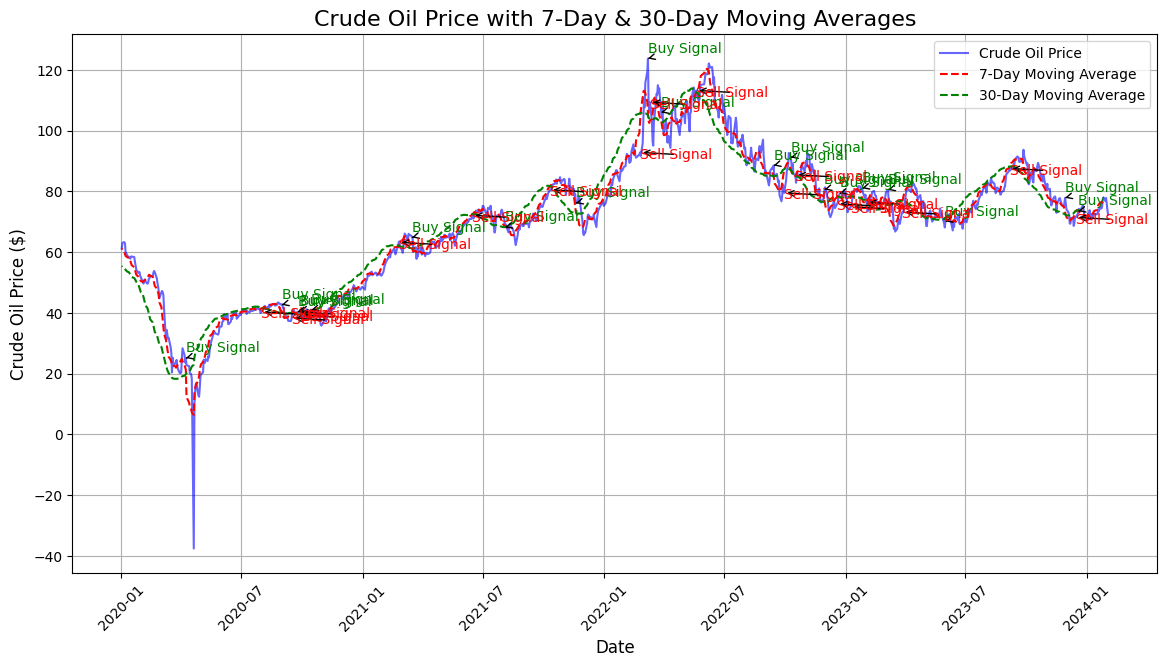

In [17]:
# 5. Moving Averages for Business Strategy: Identifying Buy/Sell Signals
# Short-term (7 days) and Long-term (30 days) moving averages
df['Price_MA_7'] = df['Crude_oil_Price'].rolling(window=7).mean()  # 7-day moving average
df['Price_MA_30'] = df['Crude_oil_Price'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Crude_oil_Price'], label='Crude Oil Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Price_MA_7'], label='7-Day Moving Average', color='red', linestyle='--')
plt.plot(df['Date'], df['Price_MA_30'], label='30-Day Moving Average', color='green', linestyle='--')

# Adding Buy/Sell signal annotations based on crossovers
for i in range(1, len(df)):
    if df['Price_MA_7'][i] > df['Price_MA_30'][i] and df['Price_MA_7'][i-1] <= df['Price_MA_30'][i-1]:
        plt.annotate('Buy Signal', xy=(df['Date'][i], df['Crude_oil_Price'][i]),
                     xytext=(df['Date'][i], df['Crude_oil_Price'][i] + 2),
                     arrowprops=dict(facecolor='green', arrowstyle='->'),
                     fontsize=10, color='green')
    elif df['Price_MA_7'][i] < df['Price_MA_30'][i] and df['Price_MA_7'][i-1] >= df['Price_MA_30'][i-1]:
        plt.annotate('Sell Signal', xy=(df['Date'][i], df['Crude_oil_Price'][i]),
                     xytext=(df['Date'][i], df['Crude_oil_Price'][i] - 2),
                     arrowprops=dict(facecolor='red', arrowstyle='->'),
                     fontsize=10, color='red')

plt.title("Crude Oil Price with 7-Day & 30-Day Moving Averages", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Crude Oil Price ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Data Preprocessing 

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Remove Unnecessary Columns
df = df.drop(columns=['Unnamed: 0'])

# Step 2: Remove commas from numerical columns (if any) and convert them to floats
# List of columns that may contain commas (numeric columns like price and volume)
columns_to_clean = ['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.', 
                    'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.', 
                    'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.',
                    'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple_Price', 
                    'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 
                    'Silver_Price', 'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price', 
                    'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 
                    'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price', 
                    'Gold_Vol.']

# Clean columns by removing commas and converting to float
for col in columns_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Step 3: Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

# Step 4: Convert Date to datetime format and extract useful features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Drop the original Date column as we have split it into year, month, day, weekday
df = df.drop(columns=['Date'])

# Step 5: Feature Engineering (Lag Features, Rolling Averages, etc.)
# Creating lag features (e.g., 1-day lag for each price and volume)
for column in columns_to_clean:
    df[f'{column}_lag_1'] = df[column].shift(1)
    df[f'{column}_lag_2'] = df[column].shift(2)
    
# Drop rows with NaN values caused by lagging (the first two rows will have NaN values)
df = df.dropna()

# Step 6: Scaling Features
scaler = StandardScaler()  # You could also use MinMaxScaler() if needed
scaled_columns = columns_to_clean  # Include all numeric columns for scaling

# Applying scaling
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Step 7: Splitting the dataset into features and target
# Assuming 'Natural_Gas_Price' is your target variable
X = df.drop(columns=['Natural_Gas_Price'])
y = df['Natural_Gas_Price']

# Step 8: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the processed data info
print(f"Processed Data Shape: {df.shape}")
print(f"Features (X): {X.shape}, Target (y): {y.shape}")



Missing Values:
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
Price_MA_7             6
Price_MA_

### Modeling
### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Linear Regression - Evaluation Report:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R² (R-squared): {r2_lr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}")
print("\n")


Linear Regression - Evaluation Report:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R² (R-squared): 0.98
Mean Absolute Percentage Error (MAPE): 0.27




### Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Regressor - Evaluation Report:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² (R-squared): {r2_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}")
print("\n")


Random Forest Regressor - Evaluation Report:
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
R² (R-squared): 0.99
Mean Absolute Percentage Error (MAPE): 0.29




### XGBosst 

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost - Evaluation Report:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² (R-squared): {r2_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}")
print("\n")


XGBoost - Evaluation Report:
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R² (R-squared): 0.99
Mean Absolute Percentage Error (MAPE): 0.28




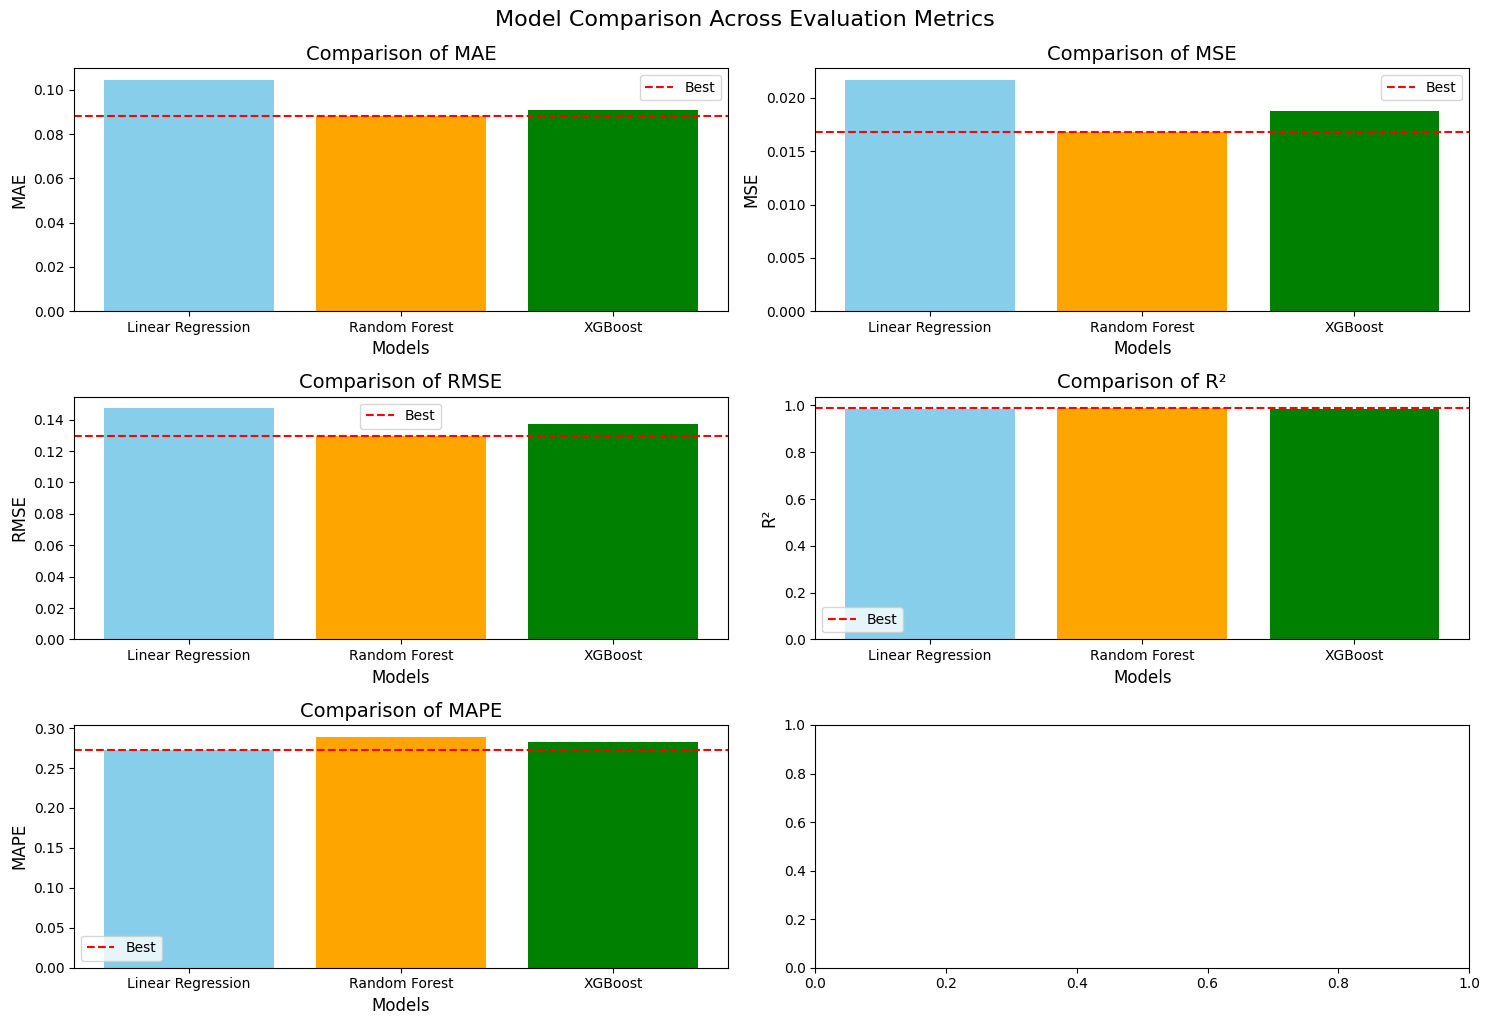

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and their respective metrics
model_names = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_values = [mae_lr, mae_rf, mae_xgb]
mse_values = [mse_lr, mse_rf, mse_xgb]
rmse_values = [rmse_lr, rmse_rf, rmse_xgb]
r2_values = [r2_lr, r2_rf, r2_xgb]
mape_values = [mape_lr, mape_rf, mape_xgb]

# Define the metrics and labels for the histogram
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
values = [mae_values, mse_values, rmse_values, r2_values, mape_values]

# Create histograms for each metric
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(model_names, values[i], color=['skyblue', 'orange', 'green'])
    ax.set_title(f'Comparison of {metric}', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Models', fontsize=12)
    if metric == 'R²':  # Highlight the higher R² is better
        ax.axhline(y=max(values[i]), color='red', linestyle='--', label='Best')
    else:  # Highlight the lower metrics are better for MAE, MSE, RMSE, MAPE
        ax.axhline(y=min(values[i]), color='red', linestyle='--', label='Best')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('Model Comparison Across Evaluation Metrics', fontsize=16, y=1.02)
plt.show()
